## 1. Prepare Data

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [38]:
X, y = datasets.make_blobs(n_samples=100, n_features=2, random_state=2)

y = np.array([1 if i > 1 else 0 for i in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [132]:
class Perceptron:
  def __init__(self, learning_rate=0.001, n_epochs=100):
    """ Initialize the attributes of the class """

    self.weights = None
    self.bias = None
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.epoch_error = 0
    self.epoch_error_list = []
    self.weights_list = []
    self.bias_list = []
  
  def unit_step_function(self, predicted_value):
    """ Step function """

    if predicted_value > 0:
      prediction = 1
    else:
      prediction = 0
    
    return prediction
  
  def fit(self, X, y):
    """ Train the weights using training data """

    n_features = X.shape[1]
    self.weights = np.zeros(n_features)
    self.bias = 0
    self.epoch_error = 0
    self.epoch_error_list = []
    self.weights_list = []
    self.bias_list = []
    error_list = []

    for _ in range(self.n_epochs):
      self.weights_list.append(self.weights)
      self.bias_list.append(self.bias)
      self.epoch_error_list.append(self.epoch_error)
      self.weights, self.bias, self.epoch_error = self.update_weights(X, y, self.weights, self.bias)
    
  def update_weights(self, X, y, w, b):
    """ Weight updation """

    error = 0
    epoch_error = []
    weights = w
    bias = b
    
    for index, x in enumerate(X):
      predicted_value = np.dot(x, self.weights) + self.bias
      prediction = self.unit_step_function(predicted_value)
      error = y[index] - prediction
      
      # Update weights
      update_factor = self.learning_rate * error
      self.weights += update_factor * x
      self.bias += update_factor
        
      epoch_error.append(error ** 2)
        
    self.epoch_error = sum(epoch_error) / len(epoch_error)
    return self.weights, self.bias, self.epoch_error

  def predict(self, X):
    """ Prediction test data """

    predicted_value = np.dot(X, self.weights) + self.bias
    predictions = []
    for i in predicted_value:
      p = self.unit_step_function(i)
      predictions.append(p)
    return predictions

  
  def score(self, y, predictions):
    """ Find the accuracy of the predictions made by the predict method """
    
    correct = 0
    wrong = 0

    for i in range(len(y)):
      if y[i] == predictions[i]:
        correct += 1
      else:
        wrong += 1

    error = correct / len(y)

    return error
  
  def feature_importance(self, X, y):
    """ Provide the feature importances on a graph"""
    
    weights_list = []
    feature_list = []
    f = 0
    for i in range(len(self.weights)):
      f += 1
      feature_list.append(f)
    for i in self.weights:
      weights_list.append(i)
    
    plt.scatter(feature_list, weights_list)
    plt.ylabel('Weights')
    plt.xlabel('Features')
    plt.show()



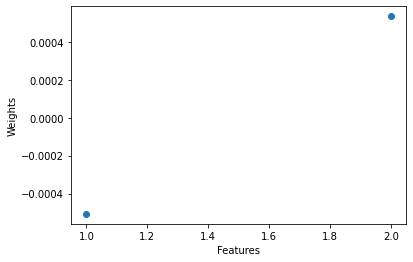

In [133]:
obj = Perceptron(0.0001, 10)
obj.fit(X_train, y_train)
predictions = obj.predict(X_test)
obj.score(y_test, predictions)
obj.feature_importance(X_train, y_train)
